In [2]:
import keras
import tensorflow as tf

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [6]:
import numpy as np

def one_hot_encode(sequences, dimension = 10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] += 1
    return results

In [7]:
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

In [11]:


m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
m.add(layers.Dense(32, activation='relu'))
m.add(layers.Dense(16, activation='relu'))
m.add(layers.Dense(1, activation='sigmoid'))

In [12]:
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#Create validation data
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [16]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

m.fit(x_train,y_train, epochs = 200, batch_size=512, validation_data=(x_val,y_val), callbacks=[tensorboard_callback])




Epoch 1/200
30/30 [==============================] - 1s 22ms/step - loss: 2.1376e-06 - accuracy: 1.0000 - val_loss: 1.2897 - val_accuracy: 0.8696
Epoch 2/200
30/30 [==============================] - 1s 18ms/step - loss: 9.7650e-07 - accuracy: 1.0000 - val_loss: 1.3790 - val_accuracy: 0.8709
Epoch 3/200
30/30 [==============================] - 0s 15ms/step - loss: 0.0423 - accuracy: 0.9933 - val_loss: 1.3779 - val_accuracy: 0.8700
Epoch 4/200
30/30 [==============================] - 0s 15ms/step - loss: 1.8299e-06 - accuracy: 1.0000 - val_loss: 1.3715 - val_accuracy: 0.8710
Epoch 5/200
30/30 [==============================] - 0s 15ms/step - loss: 1.2311e-06 - accuracy: 1.0000 - val_loss: 1.3701 - val_accuracy: 0.8706
Epoch 6/200
30/30 [==============================] - 0s 15ms/step - loss: 9.1093e-07 - accuracy: 1.0000 - val_loss: 1.3707 - val_accuracy: 0.8695
Epoch 7/200
30/30 [==============================] - 0s 16ms/step - loss: 6.3624e-07 - accuracy: 1.0000 - val_loss: 1.3765 - val

In [15]:
%tensorboard --logdir logs/fit

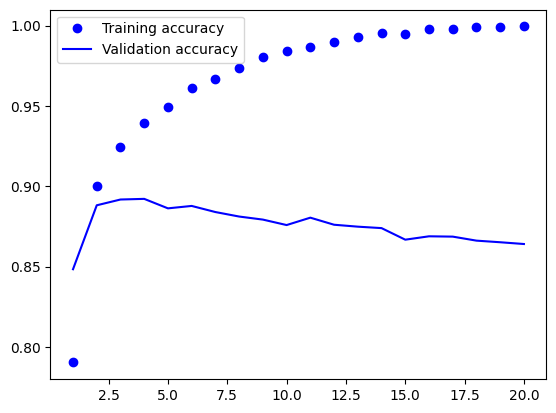

In [42]:
from matplotlib import pyplot as plt
dictionary = history.history

dictionary.keys()

plt.plot(range(1,len(dictionary['accuracy'])+1), dictionary['accuracy'], 'bo', label="Training accuracy")
plt.plot(range(1,len(dictionary['val_accuracy'])+1), dictionary['val_accuracy'], 'b', label="Validation accuracy")
plt.legend()
plt.show()